In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.mnist.load_data() # load mnist dataset

Plotting samples from train dataset:

Train Datset Shape: (60000, 28, 28) , Test Dataset Shape: (10000, 28, 28)

First 9 Samples:


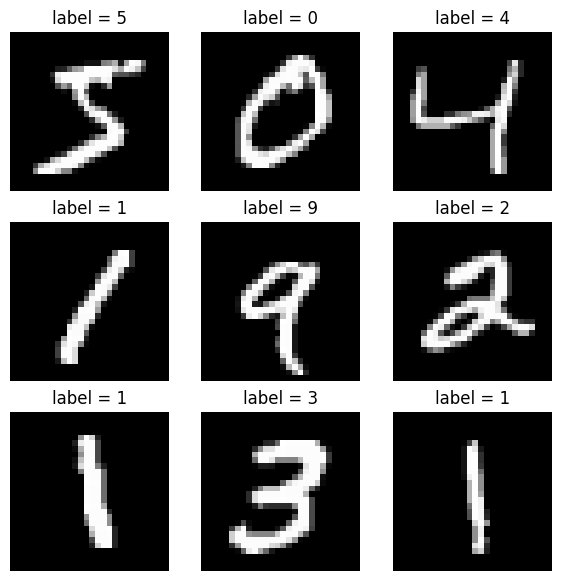

In [ ]:
print("Train Datset Shape: {} , Test Dataset Shape: {}\n".format(x_train.shape , x_test.shape))

#plotting first 9 images and label
print("First 9 Samples:")
plt.figure(figsize = (7,7))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i] , cmap = 'gray') # show the image
  plt.title("label = " + str(y_train[i])) # label of the image as image title
  plt.axis('off')

plt.show()

Preprocessing Dataset:

In [ ]:
x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1] , x_train.shape[2])) #reshape in 4D x_train
x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1] , x_test.shape[2])) # reshape in 4D x_test

x_train = x_train.astype('float32') / 255 # normalizing in range 0 to 1
x_test = x_test.astype('float32') / 255 # normalizing in range 0 to 1

y_train = to_categorical(y_train , 10) # one hot encoding of y_train
y_test = to_categorical(y_test , 10) # one hot encoding of y_test

x_train = np.stack((x_train,)*3, axis=-1)
x_test = np.stack((x_test,)*3, axis=-1)

print("Train data shape: ",x_train.shape ,",Test data shape:", x_test.shape)

Train data shape:  (60000, 28, 28, 3) ,Test data shape: (10000, 28, 28, 3)


In [ ]:
#import ResNet50 model from keras
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
model = tf.keras.Sequential() # define sequential model

model.add(ResNet50(include_top=False,pooling='avg',weights='imagenet')) # adding resnet model
model.add(Dense(units = 512 , activation = "relu")) # Fully connected layer of 512 units
model.add(Dense(units = 10 , activation = "softmax")) # output layer with 10 units as number of class = 10

model.layers[0].trainable = False

model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 24,641,930
Trainable params: 1,054,218
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam' , loss = 'categorical_crossentropy' , metrics = ['acc'])

In [ ]:
model.fit(x_train,y_train,batch_size = 32 , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 33s 10ms/step - loss: 0.5321 - acc: 0.8312
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3130 - acc: 0.8993
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2680 - acc: 0.9133
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2471 - acc: 0.9198
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2229 - acc: 0.9266
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2080 - acc: 0.9328
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1968 - acc: 0.9362
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1867 - acc: 0.9394
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1779 - acc: 0.9415
Epoch 10/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1724 - acc: 0.9437


In [ ]:
history = model.evaluate(x_test , y_test , verbose = 0)
acc = history[1] * 100

print("Accuracy: %.2f" % acc,"%")

Accuracy: 94.62 %
